In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 读取small_scale_roads.shp文件
roads = gpd.read_file('data_for_test/roads_meters.shp')

# 显示基本信息
print("=== 数据基本信息 ===")
print(f"数据形状: {roads.shape}")
print(f"坐标系: {roads.crs}")
print(f"字段列表: {list(roads.columns)}")
print(f"道路数量: {len(roads)}")

roads_sorted_by_highway = roads.sort_values('highway', ascending=False)
print("=== 按道路类型排序 ===")
print(roads_sorted_by_highway.head(10).to_string())
print(roads['highway'].unique())


primary_roads = roads.query("highway == 'primary'")
print(primary_roads.head(10).to_string())

=== 数据基本信息 ===
数据形状: (1862, 6)
坐标系: EPSG:4547
字段列表: ['source', 'pyname', 'length', 'width', 'highway', 'geometry']
道路数量: 1862
=== 按道路类型排序 ===
     source pyname length width highway                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# 根据等级可视化

d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\STUDY\anaconda\envs\gnn_edge_embedding\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12289 (\N{IDE

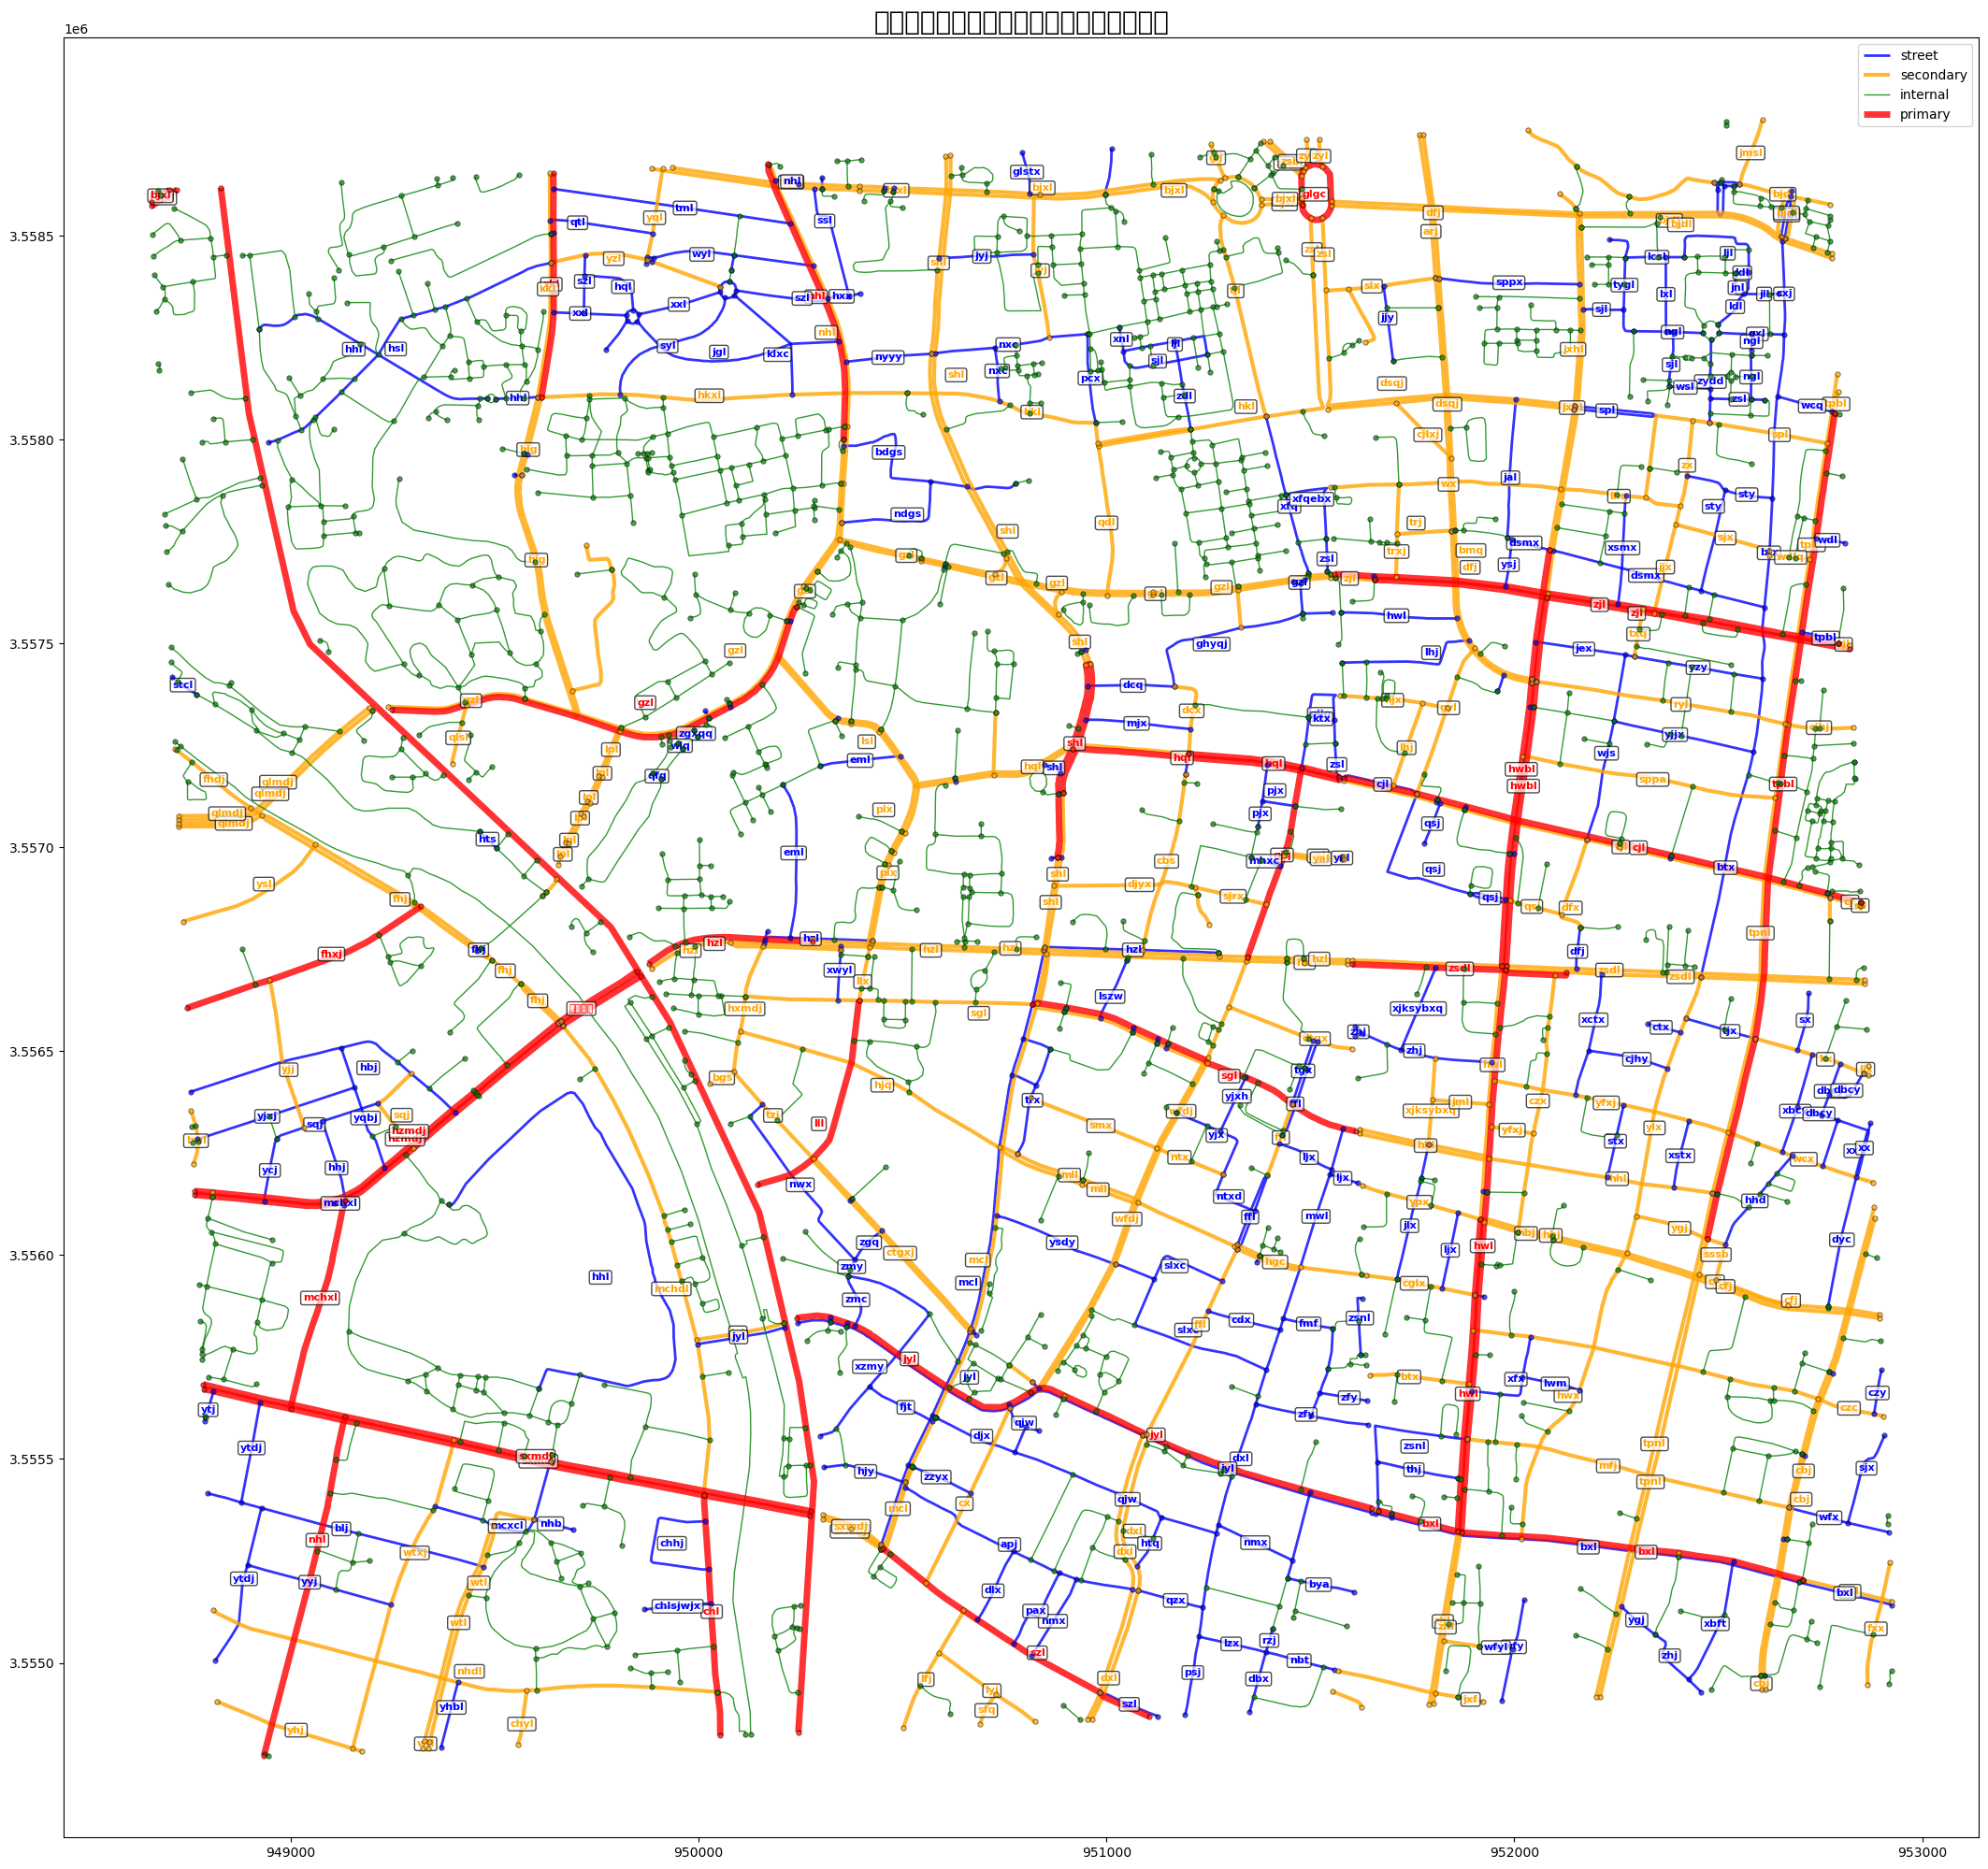

总道路数: 1862
有名称的道路: 425
无名称的道路: 1437

按道路类型统计端点数:
street: 500 个端点
secondary: 410 个端点
internal: 1408 个端点
primary: 68 个端点


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
import pandas as pd

# 读取数据
roads = gpd.read_file('data_for_test/roads_meters.shp')

# 创建图形
fig, ax = plt.subplots(figsize=(50, 25))

# 设置不同道路类型的颜色和线宽
road_styles = {
    'primary': {'color': 'red', 'linewidth': 5.0},
    'secondary': {'color': 'orange', 'linewidth': 3.0},
    'street': {'color': 'blue', 'linewidth': 2.0},
    'internal': {'color': 'green', 'linewidth': 1.0}
}

# 按道路类型分别绘制道路和端点
for highway_type in roads['highway'].unique():
    subset = roads[roads['highway'] == highway_type]
    style = road_styles[highway_type]
    
    # 绘制道路
    subset.plot(ax=ax, 
               color=style['color'], 
               linewidth=style['linewidth'], 
               label=f'{highway_type}', 
               alpha=0.8)
    
    # 提取该类型道路的端点
    endpoints = set()
    for idx, road in subset.iterrows():
        coords = list(road.geometry.coords)
        endpoints.add(coords[0])  # 起点
        endpoints.add(coords[-1])  # 终点
    
    # 绘制端点
    if endpoints:
        endpoint_x = [coord[0] for coord in endpoints]
        endpoint_y = [coord[1] for coord in endpoints]
        
        ax.scatter(endpoint_x, endpoint_y, 
                  color=style['color'], 
                  s=15,  # 点的大小
                  alpha=0.7,
                  edgecolors='black',
                  linewidth=0.5,
                  zorder=5)

# 添加道路名称标签（只显示有名称的道路）
for idx, road in roads.iterrows():
    if pd.notna(road['pyname']):  # 只显示有名称的道路
        # 计算道路中心点
        coords = list(road.geometry.coords)
        center_x = np.mean([coord[0] for coord in coords])
        center_y = np.mean([coord[1] for coord in coords])
        
        # 根据道路类型设置文字颜色
        highway_type = road['highway']
        text_color = road_styles[highway_type]['color']
        
        # 添加文字标签
        ax.text(center_x, center_y, road['pyname'], 
               fontsize=8, 
               color=text_color,
               weight='bold',
               ha='center', va='center',
               bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.7))

plt.title('道路网络、道路名称与端点（按类型着色）', fontsize=20)
plt.legend()
plt.show()

# 统计信息
named_roads = roads[roads['pyname'].notna()]
print(f"总道路数: {len(roads)}")
print(f"有名称的道路: {len(named_roads)}")
print(f"无名称的道路: {len(roads) - len(named_roads)}")

# 按道路类型统计端点数
print(f"\n按道路类型统计端点数:")
for highway_type in roads['highway'].unique():
    subset = roads[roads['highway'] == highway_type]
    endpoints = set()
    for idx, road in subset.iterrows():
        coords = list(road.geometry.coords)
        endpoints.add(coords[0])
        endpoints.add(coords[-1])
    print(f"{highway_type}: {len(endpoints)} 个端点")

# 检查数据缺失

In [6]:
import geopandas as gpd

# 读取市区一级道路数据
gdf = gpd.read_file('data_for_test/roads_meters.shp')

# 筛选pyname为zsl的数据
zsl_roads = gdf[gdf['pyname'] == 'zsl']

print(f"总数量: {len(zsl_roads)}")

if len(zsl_roads) > 0:
    print(f"\n详细信息:")
    print(zsl_roads[['pyname', 'width', 'length','highway']].to_string(index=False))
    
    print(f"\n几何信息:")
    for i, geom in enumerate(zsl_roads['geometry']):
        print(f"第{i+1}条: 类型={geom.geom_type}, 长度={geom.length:.2f}米")
        
    # 如果有多个段落，计算它们之间的距离
    if len(zsl_roads) > 1:
        print(f"\n段落间距离分析:")
        for i in range(len(zsl_roads)):
            for j in range(i+1, len(zsl_roads)):
                geom1 = zsl_roads.iloc[i]['geometry']
                geom2 = zsl_roads.iloc[j]['geometry']
                distance = geom1.distance(geom2)
                print(f"段落 {i+1} 和段落 {j+1} 距离: {distance:.2f}米")
else:
    print("没有找到pyname为'zsl'的数据")

总数量: 5

详细信息:
pyname width length   highway
   zsl    30  0.033    street
   zsl    55  0.091 secondary
   zsl    55  0.085 secondary
   zsl    30  0.080    street
   zsl    30  0.085    street

几何信息:
第1条: 类型=LineString, 长度=132.92米
第2条: 类型=LineString, 长度=139.03米
第3条: 类型=LineString, 长度=176.85米
第4条: 类型=LineString, 长度=80.12米
第5条: 类型=LineString, 长度=85.28米

段落间距离分析:
段落 1 和段落 2 距离: 1020.19米
段落 1 和段落 3 距离: 979.74米
段落 1 和段落 4 距离: 1002.63米
段落 1 和段落 5 距离: 1249.15米
段落 2 和段落 3 距离: 29.36米
段落 2 和段落 4 距离: 648.47米
段落 2 和段落 5 距离: 1149.00米
段落 3 和段落 4 距离: 610.10米
段落 3 和段落 5 距离: 1110.41米
段落 4 和段落 5 距离: 420.45米


In [ ]:
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point
import numpy as np

def safe_attr(row, key, default=None):
    return row[key] if key in row and row[key] is not None else default

def pick_intersection_point(g):
    """把任意相交几何规约为一个代表性点（Point/LineString/Multi*都处理）"""
    if g.is_empty:
        return None
    gt = g.geom_type
    if gt == "Point":
        return g
    if gt in ("MultiPoint",):
        return list(g.geoms)[0]
    if gt in ("LineString", "MultiLineString", "Polygon", "MultiPolygon"):
        return g.representative_point()
    # GeometryCollection 等
    for sub in getattr(g, "geoms", []):
        p = pick_intersection_point(sub)
        if p is not None:
            return p
    return None

def neighbors_by_intersection(gdf, geom):
    """返回与 geom 相交的行的 rid 集合（使用 sindex 加速）"""
    cand_idx = list(gdf.sindex.intersection(geom.bounds))
    if not cand_idx:
        return set()
    cand = gdf.iloc[cand_idx]
    hits = cand[cand.intersects(geom)]
    return set(hits["rid"].tolist())

def build_ego_graphs(shp_path, num_roads=50, crs_metric="EPSG:32650", seed=42):
    roads = gpd.read_file(shp_path)
    if roads.crs is None:
        roads = roads.set_crs(4326)
    roads = roads.to_crs(crs_metric).copy()
    roads = roads[roads.geometry.notnull()].reset_index(drop=True)
    roads["rid"] = np.arange(len(roads))           # 原始行号作为稳定 id

    # 仅选择 street 作为中心（若无该字段，可改成你的过滤条件）
    if "highway" in roads.columns:
        streets = roads[roads["highway"] == "street"].copy()
    else:
        streets = roads.copy()  # 没有字段就全量
    if streets.empty:
        raise ValueError("没有满足条件的 street 道路。")

    # 随机挑选中心
    streets = streets.sample(min(num_roads, len(streets)), random_state=seed)

    # 预建空间索引
    _ = roads.sindex

    ego_graphs = []
    for _, center in streets.iterrows():
        G = nx.Graph()
        c_id = int(center["rid"])

        # 加中心节点
        G.add_node(
            c_id,
            geometry=center.geometry,
            hop_level=0,
            is_center=True,
            highway=safe_attr(center, "highway", "street"),
            pyname=safe_attr(center, "pyname", "")
        )

        # ---------- 0-hop：中心与相交者 ----------
        nbr0 = neighbors_by_intersection(roads, center.geometry)
        if c_id in nbr0: nbr0.remove(c_id)

        for rid in nbr0:
            row = roads.loc[roads["rid"] == rid].iloc[0]
            if rid not in G:
                G.add_node(
                    rid,
                    geometry=row.geometry,
                    hop_level=0,
                    is_center=False,
                    highway=safe_attr(row, "highway", "unknown"),
                    pyname=safe_attr(row, "pyname", "")
                )
            inter = pick_intersection_point(center.geometry.intersection(row.geometry))
            G.add_edge(c_id, rid, hop_level=0,
                       intersection_coords=None if inter is None else (inter.x, inter.y))

        # ---------- 1-hop：0-hop 之间 + 0-hop 与其它相交者 ----------
        for rid0 in nbr0:
            geom0 = roads.loc[roads["rid"] == rid0].iloc[0].geometry

            # 1) 0-hop 之间（去重：只连 rid0 > rid1）
            nbr0b = neighbors_by_intersection(roads, geom0) & nbr0
            for rid1 in nbr0b:
                if rid1 <= rid0: 
                    continue
                inter = pick_intersection_point(
                    geom0.intersection(roads.loc[roads["rid"] == rid1].iloc[0].geometry)
                )
                G.add_edge(rid0, rid1, hop_level=1,
                           intersection_coords=None if inter is None else (inter.x, inter.y))

            # 2) 0-hop 与其它道路（neighbors-of-neighbors）
            nbr1 = neighbors_by_intersection(roads, geom0)
            nbr1.discard(c_id)
            nbr1 -= nbr0   # 与 0-hop 区分

            for ridx in nbr1:
                rowx = roads.loc[roads["rid"] == ridx].iloc[0]
                if ridx not in G:
                    G.add_node(
                        ridx,
                        geometry=rowx.geometry,
                        hop_level=1,
                        is_center=False,
                        highway=safe_attr(rowx, "highway", "unknown"),
                        pyname=safe_attr(rowx, "pyname", "")
                    )
                inter = pick_intersection_point(geom0.intersection(rowx.geometry))
                G.add_edge(rid0, ridx, hop_level=1,
                           intersection_coords=None if inter is None else (inter.x, inter.y))

        ego_graphs.append({
            "graph": G,
            "center_id": c_id,
            "zero_hop_count": len(nbr0),
            "one_hop_count": len([n for n,d in G.nodes(data=True) if d.get("hop_level")==1])
        })

    return ego_graphs, streets.reset_index(drop=True), roads


Built 50 ego-graphs.


# 可视化


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

road_styles = {
    'primary':   {'color': 'red',    'linewidth': 5.0},
    'secondary': {'color': 'orange', 'linewidth': 3.0},
    'street':    {'color': 'blue',   'linewidth': 2.0},
    'internal':  {'color': 'green',  'linewidth': 1.0},
    'default':   {'color': 'grey',   'linewidth': 1.5},  # 兜底
}

def style_of(attrs):
    """根据节点/边的属性（优先 highway）取颜色与线宽"""
    hwy = attrs.get('highway', None)
    st  = road_styles.get(hwy, road_styles['default'])
    return st['color'], st['linewidth']

def visualize_ego_graph(ego_graph, all_roads, title_prefix="EGO", save_path=None, seed=0):
    """
    左：NetworkX 拓扑视图；右：Geo 视图（叠加道路几何与交点）
    ego_graph: build_ego_graphs 返回的单个 dict（包含 graph, center_id 等）
    all_roads: build_ego_graphs 返回的 roads GeoDataFrame（含 rid 与 geometry）
    """
    G = ego_graph["graph"]
    center_id = ego_graph["center_id"]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

    # ---------- 左：图结构 ----------
    others = [n for n in G.nodes if n != center_id]
    pos = nx.shell_layout(G, nlist=[[center_id], others])

    # 画边（按道路类型上色；若两端类型不同，用灰色）
    edge_colors, edge_widths = [], []
    for u, v, ed in G.edges(data=True):
        u_color, u_lw = style_of(G.nodes[u])
        v_color, v_lw = style_of(G.nodes[v])
        if G.nodes[u].get('highway', None) == G.nodes[v].get('highway', None):
            edge_colors.append(u_color)
            edge_widths.append(min(u_lw, v_lw))   # 两端取较细者，避免视觉过粗
        else:
            edge_colors.append(road_styles['default']['color'])  # 类型不一致时用灰色
            edge_widths.append(1.2)
    nx.draw_networkx_edges(G, pos, ax=ax1, edge_color=edge_colors, width=edge_widths, alpha=0.7)

    # 画点（按道路类型着色；中心节点加大）
    node_colors, node_sizes, node_ec = [], [], []
    for n, d in G.nodes(data=True):
        c, lw = style_of(d)
        node_colors.append(c)
        node_sizes.append(500 if d.get('is_center', False) else 160)
        node_ec.append('white')
    nx.draw_networkx_nodes(G, pos, ax=ax1,
                        node_color=node_colors, node_size=node_sizes,
                        linewidths=0.8, edgecolors=node_ec)


    # ---------- 右：地图视图（按 road_styles 上色） ----------
    all_roads.plot(ax=ax2, color="#dddddd", linewidth=0.4, alpha=0.4)

    for n, d in G.nodes(data=True):
        # 取几何 & highway
        geom = d.get("geometry")
        if geom is None:
            row = all_roads.loc[all_roads["rid"] == n]
            if not row.empty:
                geom = row.iloc[0].geometry
                d.setdefault("highway", row.iloc[0].get("highway", None))

        if geom is None:
            continue

        color, lw = style_of(d)   # ← 使用你上面定义的 road_styles/style_of
        ax2.plot(*geom.xy, color=color, linewidth=lw, alpha=0.95)


    # 交点（存于边属性 intersection_coords）
    for u, v, ed in G.edges(data=True):
        pt = ed.get("intersection_coords", None)
        if pt:
            ax2.plot(pt[0], pt[1], "ko", markersize=3.5, alpha=0.9, zorder=5)

    ax2.set_title(f"{title_prefix} {center_id} — Map view")
    ax2.set_xlabel("X (m)")
    ax2.set_ylabel("Y (m)")
    ax2.grid(alpha=0.25)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=200, bbox_inches="tight")
        plt.close(fig)
    else:
        plt.show()
        
def visualize_batch(ego_graphs, all_roads, max_n=6, out_dir=None, seed=0):
    """
    批量可视化前 max_n 个 ego-graphs
    - out_dir=None 时直接显示
    - 指定 out_dir 时保存 PNG 文件（命名：ego_<center_id>.png）
    """
    n = min(max_n, len(ego_graphs))
    for i in range(n):
        eg = ego_graphs[i]
        if out_dir:
            save_path = f"{out_dir}/ego_{eg['center_id']}.png"
        else:
            save_path = None
        visualize_ego_graph(eg, all_roads, title_prefix="EGO", save_path=save_path, seed=seed)


if __name__ == "__main__":
    ego_graphs, selected, roads = build_ego_graphs("data_for_test/shp_file/roads_meters.shp", num_roads=50)
        # 看 3 个
    visualize_batch(ego_graphs, roads, max_n=50, out_dir="ego_graph_results", seed=42)